In [ ]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid
import gcm_filters

## Reading in data for 1/2 degree parameterized runs:

In [110]:
# ##Unparameterized run
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
# fs = xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# #Contains default setup based on Jansen et al 2019. MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.15 BAROTROPIC BACKSCATTER
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_default
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# # MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.3
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test1
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# ## MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test2
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# # MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test3
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# # MEKE_VISCOSITY_COEFF_KU = -0.5; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test4
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# # MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.3
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test5
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# ## MEKE_VISCOSITY_COEFF_KU = -0.5; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test6
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.5  HERE USE MEKE CASE
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test7
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.6 HERE USE MEKE CASE
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test8
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.0; MEKE_KHCOEFF = 0.8  HERE USE MEKE CASE
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test9
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0.5
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test10
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.5; MEKE_KHCOEFF = 0.3
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test11
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.6; MEKE_KHCOEFF = 0.6
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test12
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.8; MEKE_KHCOEFF = 0.8
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test13
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.2; MEKE_KHCOEFF = 0.2
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test14
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.15; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test15
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test16
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# ## MEKE_VISCOSITY_COEFF_KU = -0.3; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test20
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.6; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test21
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.8; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test22
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -1; MEKE_KHCOEFF = 0.15
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test23
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)


# ## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.15  HERE USE MEKE CASE
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test24
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0; MEKE_KHCOEFF = 0.3  HERE USE MEKE CASE
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test25
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

# ## MEKE_VISCOSITY_COEFF_KU = -0.1; MEKE_KHCOEFF = 0
# %cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/BTBS_test26
# fs=xr.open_dataset('static.nc', decode_times=False)
# av=xr.open_dataset('averages_00031502.nc',decode_times=False)

## MEKE_VISCOSITY_COEFF_KU = -0.2; MEKE_KHCOEFF = 0
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test27
fs=xr.open_dataset('static.nc', decode_times=False)
av=xr.open_dataset('averages_00031502.nc',decode_times=False)



%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/



/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/MEKE_test27
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [111]:
%%time
xh = fs.xh.values
yh = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')#.fillna(0.); 
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')#.fillna(0.);


done part 1
done part 2
CPU times: user 2.4 s, sys: 2.62 s, total: 5.02 s
Wall time: 8.44 s


## Reading in data for 1/32 with no eddy parameterization:

In [70]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
av = xr.open_dataset('averages_00002502.nc', decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/scratch/gmarques/NW2_TMP/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [4]:
%%time
xh = fs.xh.values
yh = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

cfac=16 #coarsening factor to put data onto a 1/2 degree grid.
grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.).coarsen(xh=cfac,yh=cfac, boundary="exact").mean() #coarsening
Depth=h.sum('zl')
print('done part 1')

u  = av['u'];  u = grid.interp(u,axis='X').coarsen(xh=cfac,yh=cfac, boundary="exact").mean() #coarsening
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y').coarsen(xh=cfac,yh=cfac, boundary="exact").mean() #coarsening


ValueError: Could not coarsen a dimension of size 120 with window 16

In [112]:
%%time
# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

print('done part 1')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan


done part 1
CPU times: user 1.15 s, sys: 2.28 s, total: 3.42 s
Wall time: 3.42 s


In [113]:
KE_BT_test27=KE_BT.mean('time')
KE_BC_test27=KE_BC.mean('time')
fraction_BT_test27=fraction_BT.mean('time')
fraction_BC_test27=fraction_BC.mean('time')
print('done')

done


In [92]:
# #For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
# window=15

# plt.subplots(15,figsize=(20, 15), facecolor='w', edgecolor='k',dpi=100) 

# plt.subplot(5,3,1)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test0.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test0.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.15, C_{BS}=-0.15$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)

# plt.subplot(5,3,2)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test1.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test1.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.3, C_{BS}=-0.15$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)


# plt.subplot(5,3,3)

# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test2.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test2.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.5, C_{BS}=-0.15$',fontsize=20)



# plt.subplot(5,3,4)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test3.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test3.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.15, C_{BS}=-0.3$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)


# plt.subplot(5,3,5)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test4.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test4.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.15, C_{BS}=-0.5$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)


# plt.subplot(5,3,6)

# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test5.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test5.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.3, C_{BS}=-0.3$',fontsize=20)



# plt.subplot(5,3,7)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test6.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test6.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.5, C_{BS}=-0.5$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

# plt.subplot(5,3,8)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test7.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test7.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.5, C_{BS}=-0$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

# plt.subplot(5,3,9)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test8.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test8.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.6, C_{BS}=-0$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

# plt.subplot(5,3,10)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test9.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test9.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.8, C_{BS}=-0$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

# plt.subplot(5,3,11)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test10.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test10.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.5, C_{BS}=-0.3$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()


# plt.subplot(5,3,12)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test11.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test11.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.3, C_{BS}=-0.5$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()


# plt.subplot(5,3,13)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test12.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test12.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.6, C_{BS}=-0.6$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

# plt.subplot(5,3,14)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test13.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test13.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.8, C_{BS}=-0.8$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

# plt.subplot(5,3,15)
# plt.grid()
# plt.plot(yh,np.convolve((fraction_BT_test14.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
# plt.plot(yh,np.convolve((fraction_BC_test14.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
# #plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
# plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
# plt.xlim(-70, 70); plt.xticks(fontsize=16);
# plt.ylim(0,1); plt.yticks(fontsize=16);
# plt.ylabel('Fraction',fontsize=16)
# plt.title('$C_{GM}=0.2, C_{BS}=-0.2$',fontsize=20)
# plt.xlabel('Latitude',fontsize=16)
# plt.tight_layout()

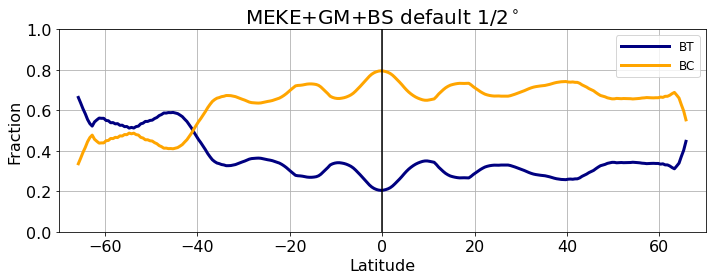

In [21]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.


plt.subplots(1,figsize=(10, 4), facecolor='w', edgecolor='k') #dpi=100

window=15

plt.subplot(1,1,1)
plt.grid()
plt.plot(fraction_BT_test0.yh,np.convolve((fraction_BT_test0.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
plt.plot(fraction_BT_test0.yh,np.convolve((fraction_BC_test0.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.ylabel('Fraction',fontsize=16)
plt.title('MEKE+GM+BS default 1/2$^\circ$',fontsize=20)
plt.xlabel('Latitude',fontsize=16)


plt.tight_layout()

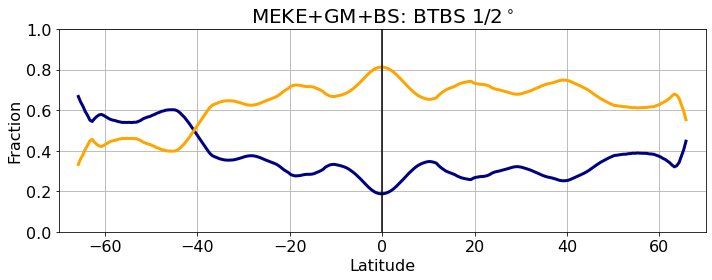

In [22]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.


plt.subplots(1,figsize=(10, 4), facecolor='w', edgecolor='k') #dpi=100

window=15

plt.subplot(1,1,1)
plt.grid()
plt.plot(fraction_BT_testBT.yh,np.convolve((fraction_BT_testBT.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
plt.plot(fraction_BT_testBT.yh,np.convolve((fraction_BC_testBT.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
#plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.ylabel('Fraction',fontsize=16)
plt.title('MEKE+GM+BS: BTBS 1/2$^\circ$',fontsize=20)
plt.xlabel('Latitude',fontsize=16)


plt.tight_layout()

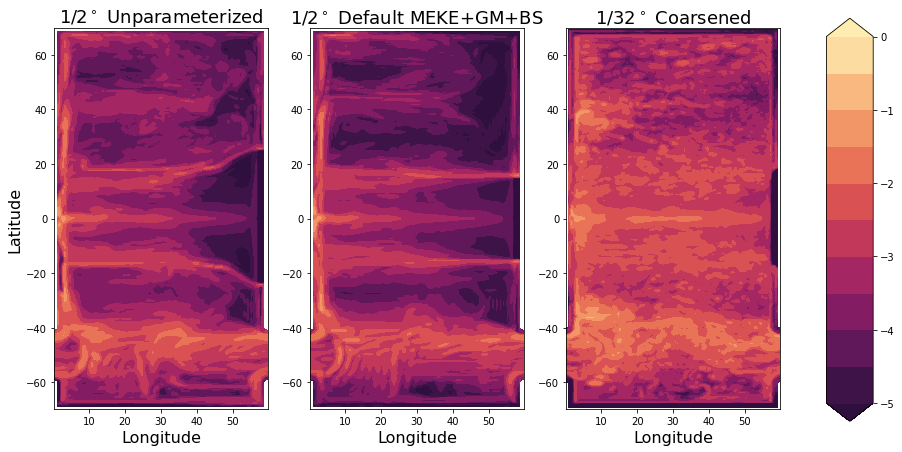

<Figure size 432x288 with 0 Axes>

In [160]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.

fig,ax=plt.subplots(3,figsize=(13, 7), facecolor='w', edgecolor='k',subplot_kw=dict(box_aspect=1)) #dpi=100

plt.subplot(1,3,1)
levels=np.linspace(-5,0,11)
plt.contourf(xh,yh,np.log10(KE_BC_05),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.ylabel('Latitude',fontsize=16)
plt.title('1/2$^\circ$ Unparameterized',fontsize=18)
plt.xlabel('Longitude',fontsize=16)
#plt.colorbar('none')

plt.subplot(1,3,2)
levels=np.linspace(-5,0,11)
plt.contourf(xh,yh,np.log10(KE_BC_05_default),levels=levels,cmap=cmocean.cm.matter_r,extend='both')
plt.title('1/2$^\circ$ Default MEKE+GM+BS',fontsize=18)
plt.xlabel('Longitude',fontsize=16)

plt.subplot(1,3,3)
levels=np.linspace(-5,0,11)
im =plt.contourf(xh,yh,np.log10(KE_BC_003125),levels=levels,cmap=cmocean.cm.matter_r,extend='both')

plt.title('1/32$^\circ$ Coarsened',fontsize=18)
plt.xlabel('Longitude',fontsize=16)


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.10, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)
plt.show()

plt.tight_layout()


In [84]:
fraction_BT_testhr.shape

(280, 120)

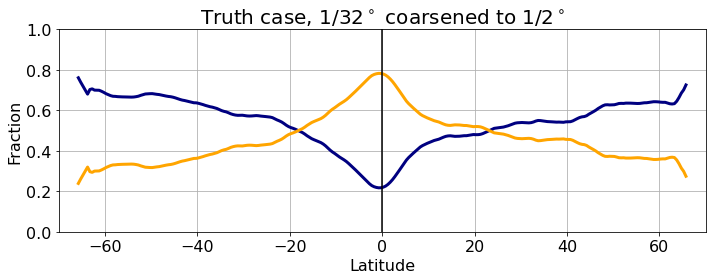

In [85]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.


plt.subplots(1,figsize=(10, 4), facecolor='w', edgecolor='k') #dpi=100

window=15

plt.subplot(1,1,1)
plt.grid()
plt.plot(fraction_BT_testhr.yh,np.convolve((fraction_BT_testhr.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3); 
plt.plot(fraction_BT_testhr.yh,np.convolve((fraction_BC_testhr.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
#plt.legend(['BT','BC'],loc='upper right',fontsize=12,handlelength=4)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.ylabel('Fraction',fontsize=16)
plt.title('Truth case, 1/32$^\circ$ coarsened to 1/2$^\circ$',fontsize=20)
plt.xlabel('Latitude',fontsize=16)


plt.tight_layout()

In [142]:
print(np.nanmean(fraction_BT_test27))
#print(np.nanmean(fraction_BT_testBT))

0.35537162


In [143]:
CBS = [-.15, -.15, -.15, -.30, -.50, -.30, -.50,  0,  0,  0, -.30, -.50, -.60, -.80, -.20, -.30, -.60, -.60, -.80,  -1,   0,   0, -.1, -.2]
CGM = [0.15, 0.30, 0.50, 0.15, 0.15, 0.30, 0.50, .5, .6, .8, 0.50, 0.30, 0.60, 0.80, 0.20,    0,    0, 0.15, 0.15, .15, .15, .30,   0,   0]

CBS_failed  =[-.15, -.5, -.8, -1,]
CGM_failed = [0,      0,   0,  0,]
BTKE_truth = [0.554]
BTKE = np.array([0.38, 0.37, 0.38, 0.45, 0.52, 0.46, 0.57, 0.31, 0.31, 0.31, 0.48, 0.55,
                0.61, 0.68, 0.41, 0.39, 0.49, 0.55, 0.60, 0.63, 0.34, 0.31, 0.35, 0.355])/.554


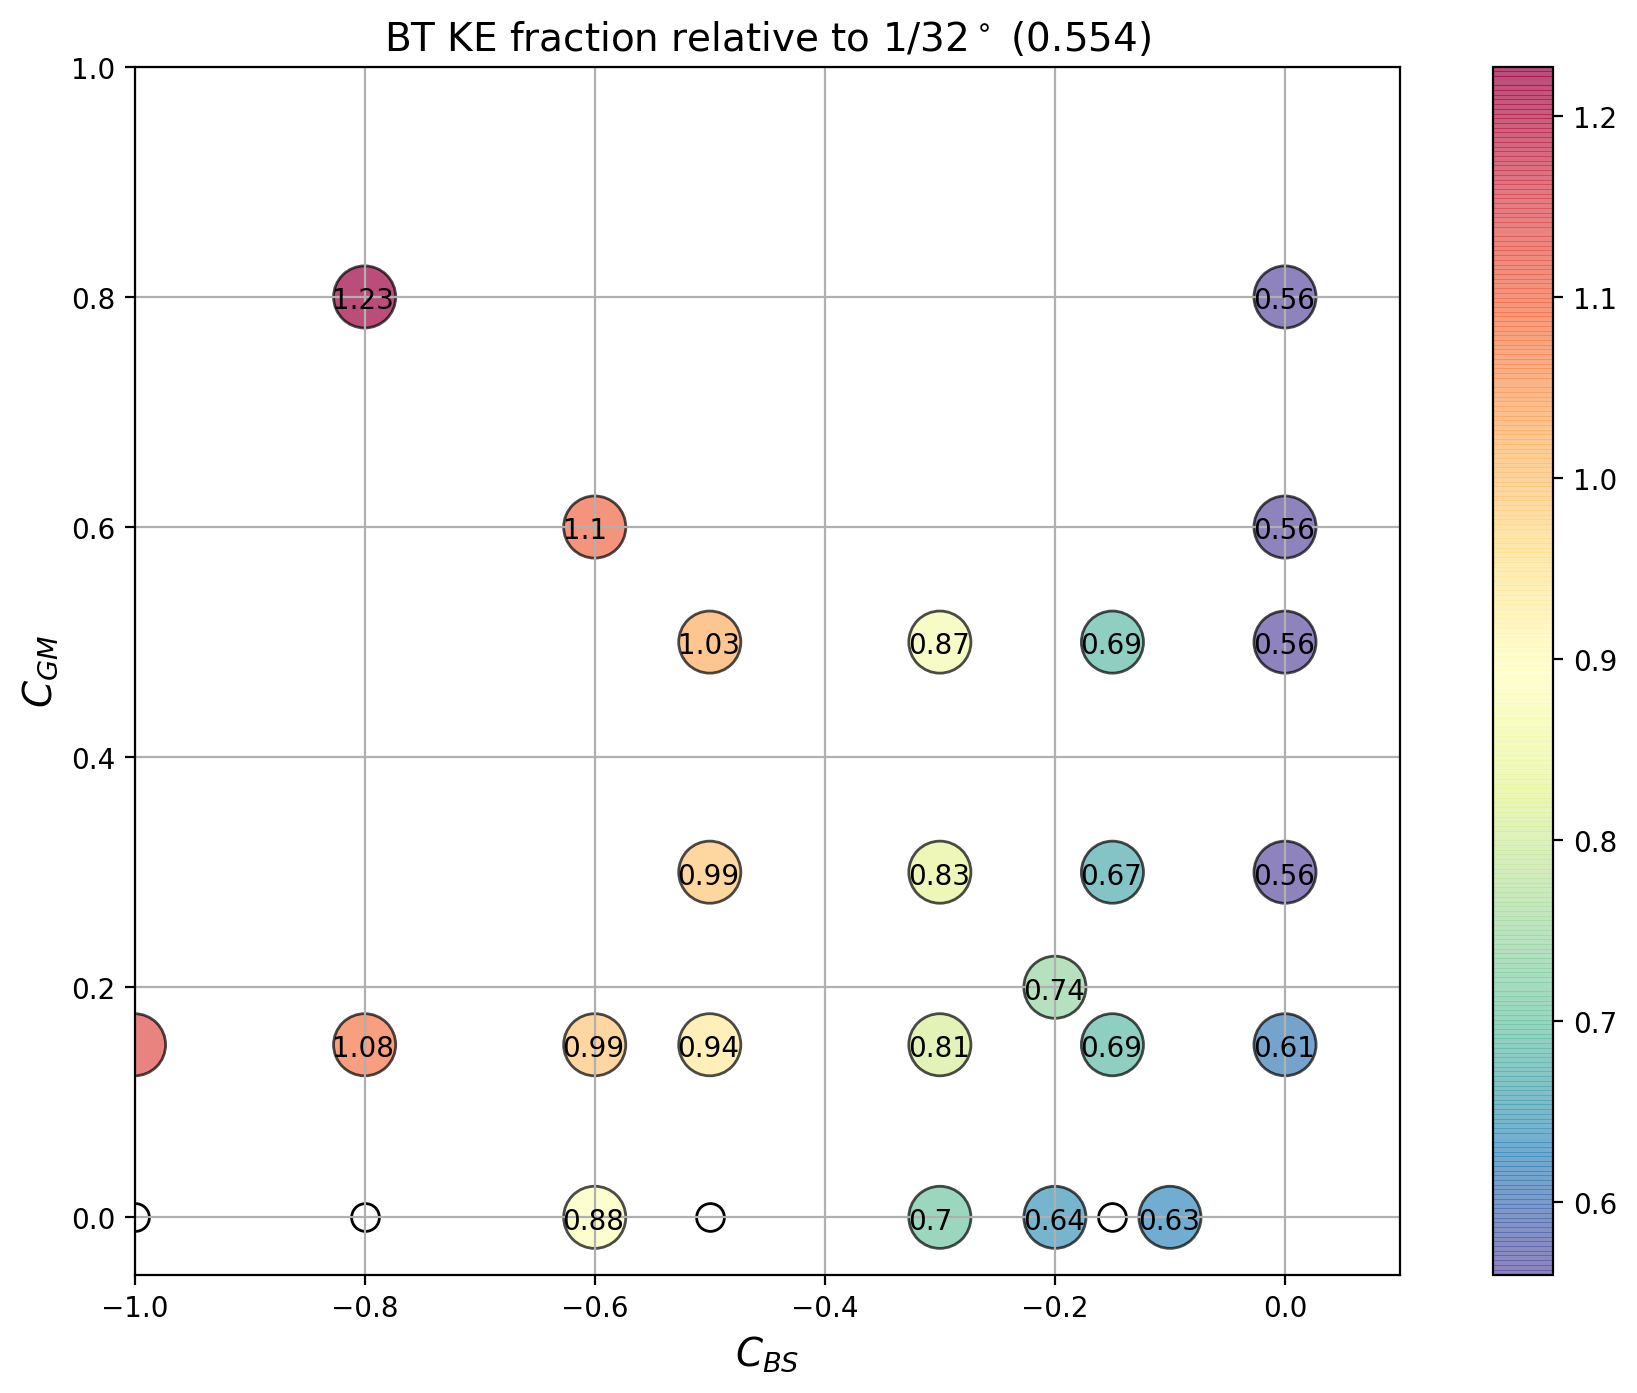

In [144]:

fig = plt.figure(figsize=(12,8),dpi=200)
ax = fig.add_subplot(111)
plt.scatter(CBS_failed,CGM_failed,s=100,color='w',edgecolors='k')

plt.scatter(CBS,CGM,s=500, c=BTKE,cmap='Spectral_r',edgecolors='k',alpha=0.7)
for i, label in enumerate(BTKE):
    plt.annotate(BTKE[i].round(2),(CBS[i]-0.028, CGM[i]-0.01),color='k',fontsize=10)

plt.xlim([-1.,.1]); plt.ylim([-0.05,1])
plt.xlabel('$C_{BS}$',fontsize=14)
plt.ylabel('$C_{GM}$',fontsize=14)
plt.title('BT KE fraction relative to 1/32$^\circ$ (0.554)',fontsize=14)
ax.set_aspect('equal', 'box')
plt.colorbar(); plt.grid()

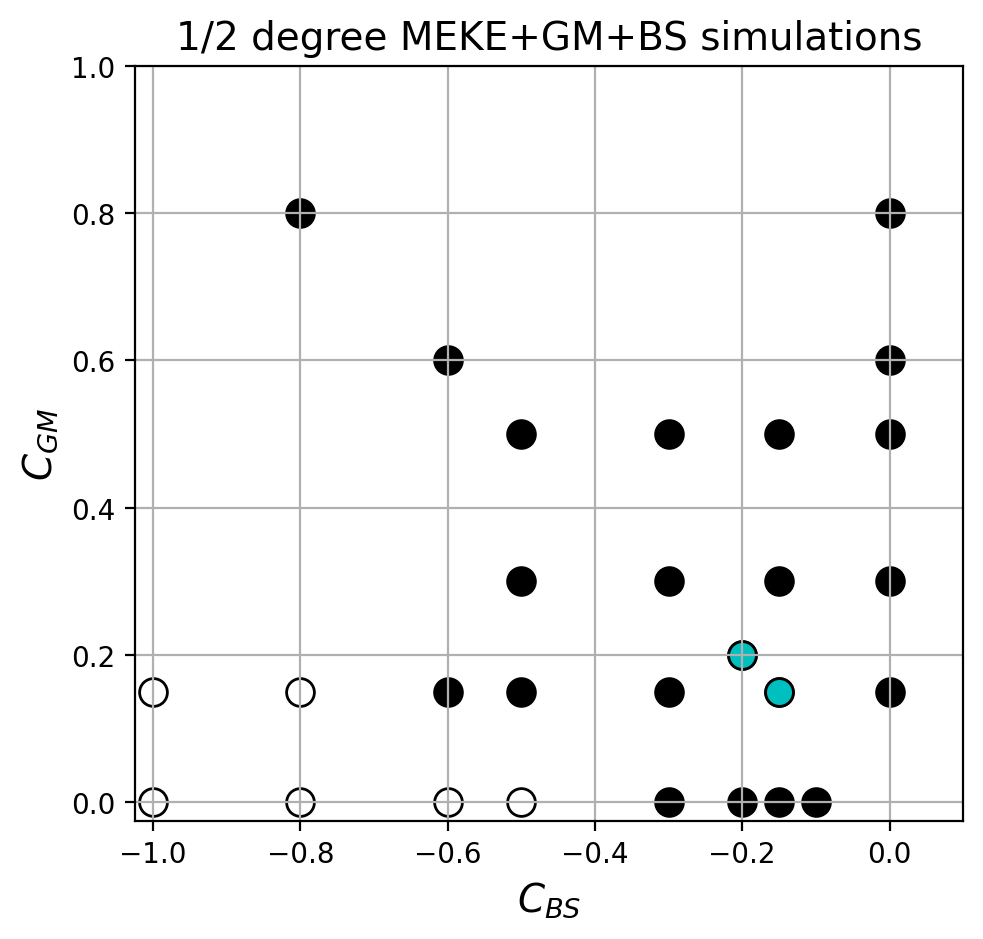

In [16]:

fig = plt.figure(figsize=(7,5),dpi=200)
ax = fig.add_subplot(111)

CBS = [-.15, -.15, -.15, -.30, -.50, -.30, -.50, 0., 0., 0., -.30, -.50, -.60, -.80, -.20, -.1, -.15, -.2, -.3, -.6, 0, 0]
CGM = [.15, .30, .50, .15, .15, .30, .50, .50, .60, .80, .50, .30, .60, .80, .20, 0,0,0,0,0.15,.15,.3]

CBS_failed  = [-0.5, -0.6, -0.8, -1., -0.8, -1.]
CGM_failed = [0,     0,    0,    0,    .15, .15]
plt.scatter(CBS,CGM,s=100,color='k',edgecolors='k')
plt.scatter(-.2,.2,s=100,color='c',edgecolors='k')
plt.scatter(-.15,.15,s=100,color='c',edgecolors='k')
plt.scatter(CBS_failed,CGM_failed,s=100,color='w',edgecolors='k')


#for i, label in enumerate(BTKE):
#    plt.annotate(BTKE[i].round(2),(CBS[i]-0.045, CGM[i]-0.02),color='k',fontsize=12)

plt.xlim([-1.025,.1]); plt.ylim([-0.025,1])
plt.xlabel('$C_{BS}$',fontsize=14)
plt.ylabel('$C_{GM}$',fontsize=14)
plt.title('1/2 degree MEKE+GM+BS simulations',fontsize=14)
ax.set_aspect('equal', 'box')
plt.grid()